In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("survey/survey_answers.csv", header=0,
    names=["t", "edu_lvl", "expt_area", "gen_tw", "emp_tw", "tab_tw", "txt_tw", "fig_tw", "enh_und", "fig_txt_tu", "txt_fig_tu", "fig_txt_rd", "txt_fig_rd"])

df.drop(columns="t", inplace=True)

df["edu_lvl"].replace({
    "Högskola/Universitet på Grundnivå - University (Bachelor's)": "University (Bachelor's)",
    "Högskola/Universitet på Advancerad nivå - University (Master's)": "University (Master's)",
    "Phd": "PhD"
}, inplace=True)

df["enh_und"].replace({
    "Figure": "SHAP Figure",
    "Shapley Figure": "SHAP Figure"
}, inplace=True)

df["enh_und"].replace({
    "SHAP Figure": 1,
    "Textual description": 0
}, inplace=True)

df = df.replace("Strongly agree", "Strongly Agree")

df = df.replace({
    "Strongly Disagree": 0,
    "Disagree": 1,
    "Undecided": 2,
    "Agree": 3,
    "Strongly Agree": 4
})


d = {
    "wireless communication": "Wireless Communication and IoT",
    "Wireless Communication": "Wireless Communication and IoT",
    "Wireless": "Wireless Communication and IoT",
    "wireless networks": "Wireless Communication and IoT",
    "IoT": "Wireless Communication and IoT",
    "Student": "AI Novice"
}

for i in range(len(df)):
    areas_list = df.loc[i, "expt_area"].split(", ")
    areas_list = list(set(pd.Series(areas_list).replace(d).values))
    

    # for area in areas_list:
    #     if area not in df.columns:
    #         df[area] = 0
    #     df.loc[i, area] = 1

# df.drop(columns=["expt_area", "sensors networks", "5G and beyond", "Jag"], inplace=True)

display(df)

,edu_lvl,expt_area,gen_tw,emp_tw,tab_tw,txt_tw,fig_tw,enh_und,fig_txt_tu,txt_fig_tu,fig_txt_rd,txt_fig_rd
0,PhD,"AI Expert, Data Analysis Expert, Automotive Ex...",3,1,2,3,4,1,4,1,4,1
1,PhD,Data Analysis Expert,1,1,2,3,3,1,4,3,4,2
2,PhD,"AI Expert, Automotive Expert, Cybersecurity",2,2,2,3,3,1,3,1,4,1
3,University (Master's),AI Novice,3,3,1,3,1,0,0,3,1,3
4,PhD,"AI Novice, Cybersecurity",1,1,0,1,1,0,1,2,1,2
5,University (Master's),Wireless,4,4,0,3,4,1,3,1,4,0
6,University (Master's),"AI Expert, Wireless",1,2,1,2,2,1,3,1,3,1
7,PhD,"AI Novice, Cybersecurity",1,2,2,2,2,0,1,2,3,2
8,PhD,Wireless,3,3,3,1,2,1,3,1,3,1
9,PhD,AI Novice,3,3,1,2,2,1,3,2,3,1


In [2]:
def piechart(name):
    label_dict = {0: "Strongly Disagree", 1: "Disagree", 2: "Undecided", 3: "Agree", 4: "Strongly Agree"}
    color_dict = {0: "tab:purple", 1: "tab:blue", 2: "tab:orange", 3: "tab:green", 4: "tab:red"}
    unique, sizes = np.unique(df[name], return_counts=True)

    labels = [label_dict[x] for x in unique]

    colors = [color_dict[x] for x in unique]

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=None)
    plt.axis('equal')
    plt.legend()
    plt.savefig("../images/survey/" + name + "_pie.pdf", dpi=300)

In [3]:
# piechart("gen_tw")

In [4]:
def survey_bar_count(feature, xlabel=False):
    x = df[feature]
    unique, counts = np.unique(x, return_counts=True)

    # bc = plt.bar(x=unique, height=counts*100/29)

    plt.figure(figsize=(8, 2))

    # df_stacked = pd.DataFrame(
    #     {"Strongly Disagree": [0, 0, 2],
    #     "Disagree": [0, 0, 2],
    #     "Undecided": [0, 2, 0],
    #     "Agree": [2, 0, 0],
    #     "Strongly Agree": [2, 0, 0]},
    #     index=["Positive", "Neutral", "Negative"])
    
    splot = sns.barplot(y=unique, x=counts*100/29, orient="h", order=[4, 3, 2, 1, 0], color="tab:orange")

    for p in splot.patches:
        splot.annotate(format(p.get_width(), '.1f') + "%",
            (p.get_width(), p.get_y()),
            ha = 'center', va = 'center',
            size=10,
            xytext = (-12, -10),
            textcoords = 'offset points')

    plt.ylabel("Agreement", size=14)
    plt.yticks([0, 1, 2, 3, 4], labels=["Strongly Agree", "Agree", "Undecided", "Disagree", "Strongly Disagree"])
    if xlabel:
        plt.xlabel("Percentage of participants", size=14)
    plt.xlim((0, 60))

    plt.savefig("../images/survey/" + feature + "_bar.pdf", dpi=300, bbox_inches="tight")

In [5]:
print(df["fig_txt_tu"].mean())
print(df["fig_txt_rd"].mean())
print(df["txt_fig_tu"].mean())
print(df["txt_fig_rd"].mean())
# print(df["tab_tw"].std())
# print(df["txt_tw"].std())
# print(df["fig_tw"].std())



2.566666666666667
2.966666666666667
1.8666666666666667
1.5333333333333334


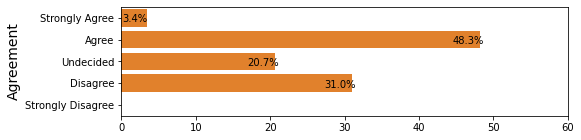

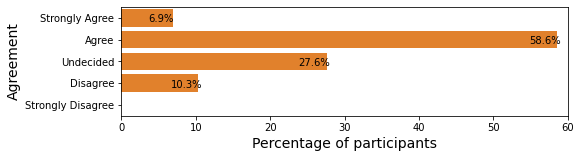

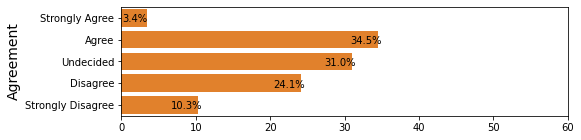

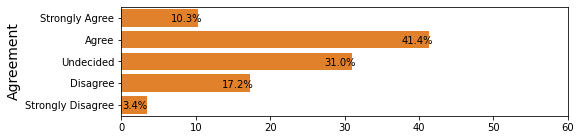

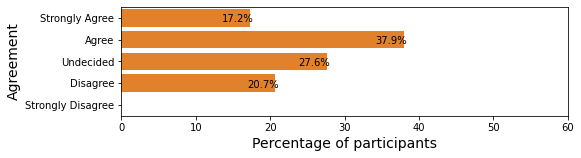

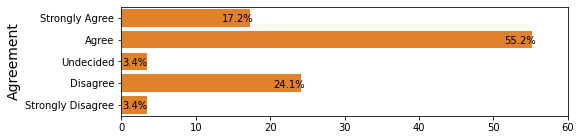

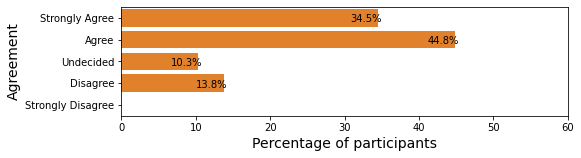

In [6]:
# survey_bar_count("gen_tw")
# survey_bar_count("emp_tw", True)

# display(df.loc[(df["enh_und"] == 0), "expt_area"])
# display(df.loc[(df["enh_und"] == 1), "expt_area"])

# display(df.loc[(df["fig_txt_tu"] == 2), "expt_area"])
# display(df.loc[(df["fig_txt_tu"] == 3), "expt_area"])
# display(df.loc[(df["fig_txt_tu"] == 4), "expt_area"])

# print("------------------")
# display(df.loc[(df["enh_und"] == 0), "expt_area"])
# display(df.loc[(df["enh_und"] == 1), "expt_area"])

# display(df.loc[(df["fig_txt_rd"] == 2), "expt_area"])
# display(df.loc[(df["fig_txt_rd"] == 3), "expt_area"])
# display(df.loc[(df["fig_txt_rd"] == 4), "expt_area"])

# display(df.loc[(df["txt_tw"] == 3) | (df["txt_tw"] == 4), "expt_area"])
# display(df.loc[(df["txt_tw"] == 2), "expt_area"])
# display(df.loc[(df["txt_tw"] == 0) | (df["txt_tw"] == 1), "expt_area"])

# display(df.loc[(df["fig_tw"] == 3) | (df["fig_tw"] == 4), "expt_area"])
# display(df.loc[(df["fig_tw"] == 2), "expt_area"])
# display(df.loc[(df["fig_tw"] == 0) | (df["fig_tw"] == 1), "expt_area"])

survey_bar_count("gen_tw")
survey_bar_count("emp_tw", True)

survey_bar_count("tab_tw")
survey_bar_count("txt_tw")
survey_bar_count("fig_tw", True)

survey_bar_count("fig_txt_tu")
survey_bar_count("fig_txt_rd", True)

In [62]:


def get_stuff(question, expertise, r=(0,5)):
    outs = []
    for i in range(r[0], r[1]):
        # indexes = []
        temp = df.loc[(df[question] == i), "expt_area"]
        temp2 = []
        for elem in temp:
            # indexes.append(elem.index)
            comb = elem.split(", ")
            comb = [comb[0]]
            temp2 += comb
        
        for elem in expertise:
            for j in range(temp2.count(elem)):
                outs = outs + [i]
    return np.array(outs)


q = "fig_tw"

# display(df.loc[(df[q] == 4), "expt_area"])
# display(df.loc[(df[q] == 3), "expt_area"])
# display(df.loc[(df[q] == 2), "expt_area"])
# display(df.loc[(df[q] == 1), "expt_area"])
# display(df.loc[(df[q] == 0), "expt_area"])

all_expertise = ["AI Novice", "AI Expert", "Cybersecurity", "Wireless", "Data Analysis Expert", "Automotive Expert"]

for elem in all_expertise:
    exp_scores = get_stuff(q, [elem])
    print("%s:\t\t %0.3f (+/- %0.3f)\tN = %d" % (elem, exp_scores.mean(), exp_scores.std(), len(exp_scores)))

AI Novice:		 2.167 (+/- 0.986)	N = 12
AI Expert:		 3.000 (+/- 0.707)	N = 8
Cybersecurity:		 2.500 (+/- 0.500)	N = 2
Wireless:		 2.250 (+/- 1.090)	N = 4
Data Analysis Expert:		 2.333 (+/- 0.943)	N = 3
Automotive Expert:		 4.000 (+/- 0.000)	N = 1


In [119]:
from scipy.stats import ttest_ind, ttest_rel, ttest_ind_from_stats

def print_ttest(a, b, alt="greater", typ="rel"):
    if typ == "rel":
        print(ttest_rel(a, b, alternative=alt), len(a) + len(b) - 2)
    elif typ == "ind":
        print(ttest_ind(a, b, alternative=alt), len(a) + len(b) - 2)

expert_area = ["AI Expert", "Automotive Expert", "Cybersecurity"]
expert_area2 = ["AI Novice", "Wireless", "Data Analysis Expert"]

fig_tw = get_stuff("fig_tw", all_expertise)
txt_tw = get_stuff("txt_tw", all_expertise)
tab_tw = get_stuff("tab_tw", all_expertise)

print(fig_tw.mean(), fig_tw.std())
# print(df["fig_tw"].mean(), df["fig_tw"].std())
print(txt_tw.mean(), txt_tw.std())
# print(df["txt_tw"].mean(), df["txt_tw"].std())
print(tab_tw.mean(), tab_tw.std())
# print(df["tab_tw"].mean(), df["tab_tw"].std())

print_ttest(fig_tw, txt_tw, alt="two-sided", typ="rel")
# print_ttest(txt_tw, tab_tw)

2.5 0.991631652042901
2.3666666666666667 0.9826268648655783
1.9666666666666666 1.0482790129010926
Ttest_relResult(statistic=2.112235418114766, pvalue=0.043397417810775565) 58
